In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# get HCFAI

In [5]:
# Specify the path to your CSV file
# data_path = 'E:\\THESIS\\MS\\Data Collection - Preparation\\rg1-revised-cleaned-with-popcount-and-neighbors.csv'
region = 11
data_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_cleaned_sum.csv'
df = pd.read_csv(data_path)
df.head(2)

,ID,barangay_name,city_name,province_name,children_m,elderly_me,women_mean,youth_mean,women_repr,phall_mean,...,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,youth_children_sum,youth_elderly_sum,youth_phall_sum,youth_women_sum,youth_women_repr_sum,youth_youth_sum
0,3268077,Manla,Sapang Dalaga,Misamis Occidental,3.322376,1.261272,11.197638,5.198903,5.568056,3.271456,...,0,0,3284661,16.736107,53.158016,20.180352,371.613904,179.162208,89.088896,83.182448
1,3268078,Casul,Sapang Dalaga,Misamis Occidental,3.322376,1.261272,11.197638,5.198903,5.568056,2.874905,...,0,0,3284661,16.995602,6.644752,2.522544,46.451738,22.395276,11.136112,10.397806


In [6]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name', 'children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'phall_mean',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'youth_children_sum',
       'youth_elderly_sum', 'youth_phall_sum', 'youth_women_sum',
       'youth_women_repr_sum', 'youth_youth_sum'],
      dtype='object')

In [7]:
# Rename columns
column_mapping = {
    'youth_children_sum': 'popden_chi',
    'youth_elderly_sum': 'popden_eld',
    'youth_women_sum': 'popden_wom',
    'youth_women_repr_sum': 'popden_w_1',
    'youth_youth_sum': 'popden_you',
    'youth_phall_sum': 'popden_all',
}


df = df.rename(columns=column_mapping)
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df[df['RHU_Presence'] == 1]

dropcols = ['children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'phall_mean',]
df = df.drop(columns=dropcols)

# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [8]:
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you
0,3268077,Manla,Sapang Dalaga,Misamis Occidental,0.517751,0.625679,0.726204,0.0,0,0,0,3284661,16.736107,53.158016,20.180352,371.613904,179.162208,89.088896,83.182448
1,3268078,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,0,3284661,16.995602,6.644752,2.522544,46.451738,22.395276,11.136112,10.397806
2,3268079,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,0,3284661,17.179640,28.367837,33.189589,294.813589,141.001793,71.452859,60.769129
3,3268080,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,0,3284661,17.594017,19.336583,22.720481,202.067257,96.682901,49.549983,42.298767
4,3268081,El Paraiso,Sapang Dalaga,Misamis Occidental,0.612346,0.635244,0.799329,0.0,0,0,0,3284661,18.150602,26.865536,26.408392,254.685124,119.247247,58.475136,50.837339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,3469905,Santo Domingo,San Fernando,Bukidnon,0.433440,0.752611,0.655233,0.0,0,0,0,3435329,54.406343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7931,3469906,San Jose,San Fernando,Bukidnon,0.471157,0.764484,0.674019,0.0,0,0,0,3435329,56.041875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7932,3469907,Cayaga,San Fernando,Bukidnon,0.477205,0.767902,0.682228,0.0,0,0,0,3435329,57.245252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7933,3469908,Cayaga,San Fernando,Bukidnon,0.477205,0.767902,0.682228,0.0,0,0,0,3435329,58.506323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [10]:
# Impute NaNs with 0, considering data type safety
for col in columns_with_nan:
    # Check data type before imputing (avoid unintended conversions)
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)  # Impute with 0 for numeric columns
    else:
        df[col] = df[col].fillna('NA')  # Impute with 'NA' for non-numeric columns
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you
0,3268077,Manla,Sapang Dalaga,Misamis Occidental,0.517751,0.625679,0.726204,0.0,0,0,0,3284661,16.736107,53.158016,20.180352,371.613904,179.162208,89.088896,83.182448
1,3268078,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,0,3284661,16.995602,6.644752,2.522544,46.451738,22.395276,11.136112,10.397806
2,3268079,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,0,3284661,17.179640,28.367837,33.189589,294.813589,141.001793,71.452859,60.769129
3,3268080,Casul,Sapang Dalaga,Misamis Occidental,0.799777,0.637678,0.760123,0.0,0,0,0,3284661,17.594017,19.336583,22.720481,202.067257,96.682901,49.549983,42.298767
4,3268081,El Paraiso,Sapang Dalaga,Misamis Occidental,0.612346,0.635244,0.799329,0.0,0,0,0,3284661,18.150602,26.865536,26.408392,254.685124,119.247247,58.475136,50.837339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7930,3469905,Santo Domingo,San Fernando,Bukidnon,0.433440,0.752611,0.655233,0.0,0,0,0,3435329,54.406343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7931,3469906,San Jose,San Fernando,Bukidnon,0.471157,0.764484,0.674019,0.0,0,0,0,3435329,56.041875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7932,3469907,Cayaga,San Fernando,Bukidnon,0.477205,0.767902,0.682228,0.0,0,0,0,3435329,57.245252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7933,3469908,Cayaga,San Fernando,Bukidnon,0.477205,0.767902,0.682228,0.0,0,0,0,3435329,58.506323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
columns_with_nan = [col for col in df.columns if df[col].isna().any()]
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [12]:
def HCI_calc(total_ai, total_gi, total_hi, total_ji, total_ki, total_mi,
              distance, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei, rhus_fi):

    total_vulnerable = total_gi + total_hi + total_ji + total_ki + total_mi
    total_pop = total_ai
    population_to_be_served = total_vulnerable + np.maximum(0, total_pop - total_vulnerable)

    # Calculate y for the entire Series without using if condition
    y = np.where(population_to_be_served == 0, 0, 20000 / ((population_to_be_served) * (distance + rhus_fi)))
    mc = np.tanh(y)

    w_bi = 0.3 # roads
    w_ci = 0.2 # POIs
    w_di = 0.5 # land cov

    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di * w_di)

    # Normalize each factor
    rain_intensity_normalized = (hazard1_ei - hazard1_ei.min()) / (hazard1_ei.max() - hazard1_ei.min())
    flood_probability_normalized = (hazard2_ei - hazard2_ei.min()) / (hazard2_ei.max() - hazard2_ei.min())
    drought_mean_normalized = (hazard3_ei - hazard3_ei.min()) / (hazard3_ei.max() - hazard3_ei.min())
    w_rain = 0.4
    w_flood = 0.3
    w_drought = 0.3
    c = (w_rain * rain_intensity_normalized) + (w_flood * flood_probability_normalized) + (w_drought * drought_mean_normalized)

    f = b - c
    f = np.tanh(f)

    hci = mc * f
    hcfai = (1 + np.tanh(hci / 2)) / 2  # Sigmoid function

    return hcfai

In [13]:
# VARIABLES
# population vulnerable
popall = df["popden_all"]
children = df["popden_chi"]
elderly = df["popden_eld"]
women = df["popden_wom"]
women_reproductive = df["popden_w_1"]
youth = df["popden_you"]
distance = df["Distance_to_Nearest_RHU_km"]

flood = df["flood_probability_value"]
rain_intensity = df["rain intensity_value"]
drought = df["drought_value"]
roads = df["Road_Presence"]
rhus = df["RHU_Presence"]
pois = df["POI_Presence"]
buildability = df["buildability_landcov"]

In [14]:
df['HCFAI'] = HCI_calc(popall, children, elderly, women, women_reproductive, youth, distance,
    roads, pois, buildability, drought, rain_intensity, flood, rhus)

# Data exploration and visualization

In [15]:
print(max(list(df['HCFAI'].unique())))
# list(df['HCFAI'].unique())
print(min(list(df['HCFAI'].unique())))
# list(df['drought_value'])
# list(df['rain intensity_value'])
# list(df['flood_probability_value'])
for col in df.columns:
  print(col)

0.6480820393364557
0.34678411742465953
ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


In [16]:
# mid_to_high = []
# for i in list(df['HCFAI']):
#     if i >= 0.53:
#         mid_to_high.append(i)

# filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
# filtered_original_df = df[df['RHU_Presence'] == 1]

# x = df['HCFAI'].notna() # removing nan values
# x = df[x]
x=df[['popden_all', 'popden_you', "popden_w_1",
                      "popden_wom", "popden_eld", 'popden_chi',
                      'Distance_to_Nearest_RHU_km', "POI_Presence", "Road_Presence", "RHU_Presence",
                      'buildability_landcov', "drought_value", "rain intensity_value",
                         "flood_probability_value", "HCFAI"]]
x = x.sort_values(by='HCFAI', ascending=False)
# x[x['RHU_Presence']==0] # 4674 rows
x # 13420 rows
# len(locs_with_RHU['RHU_Presence'])

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
6376,6587.349517,1488.764604,1816.469152,3307.511199,458.948570,634.157829,0.838568,1,1,0,1.0,1.035125,0.000000,0.248322,0.648082
6167,82.192440,17.078510,18.745940,39.209840,4.176990,10.577220,35.083947,1,1,0,1.0,0.414088,1.134438,0.195204,0.643519
6658,197.261856,40.988424,44.990256,94.103616,10.024776,25.385328,32.927086,1,1,0,1.0,0.414088,1.134438,0.195204,0.642557
3842,321.465902,72.891980,76.351234,159.003324,11.489756,51.147924,38.092729,1,1,0,1.0,0.362568,0.878342,0.099456,0.640197
3404,458.971540,78.711508,101.897288,222.780116,34.595345,61.509892,24.656563,1,1,0,1.0,0.816329,0.000000,0.589651,0.638671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,464.516241,96.414156,114.643686,223.075812,29.302335,54.013488,15.452887,0,0,0,0.0,1.340293,1.171199,0.727385,0.348702
2589,1047.770330,201.062310,267.209875,511.796590,63.834290,121.558400,1.992427,0,0,0,0.0,1.304715,1.128395,0.803084,0.347621
4119,284.987029,57.413163,67.057955,137.457173,15.226473,39.908854,12.918861,0,0,0,0.0,1.340293,1.171199,0.727385,0.346801
4224,90.762387,18.731844,22.181660,43.651599,4.934519,11.529452,13.233521,0,0,0,0.0,1.340293,1.171199,0.727385,0.346784


In [17]:
locs_with_RHU = x[x['RHU_Presence']==1] # 27 rows (bcos there are nan values we disregarded)
locs_with_RHU

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
6282,2952.460138,665.420835,833.715586,1480.132065,209.061062,259.129266,0.0,1,1,1,1.0,1.022044,0.876275,0.263652,0.617085
1901,4174.191583,846.963212,1084.230225,2091.994436,361.468484,437.250085,0.0,1,0,1,1.0,1.084778,1.098414,0.517047,0.524260
2911,1563.492142,318.821628,413.618504,760.910164,79.137654,177.627374,0.0,1,0,1,1.0,1.217322,1.143773,0.371418,0.518086
6048,7199.032539,1399.292970,1828.207931,3644.756873,562.227808,853.880642,0.0,1,1,1,0.0,0.954045,0.000000,1.114732,0.516139
1124,12927.951759,2709.497660,3683.096627,6673.095218,1055.828803,1197.656827,0.0,1,1,1,0.0,0.949436,0.000000,1.122216,0.514162
2852,45395.823453,10052.398227,13219.553468,23089.343325,2842.673299,4547.756958,0.0,1,1,1,0.0,1.102757,0.000000,0.937484,0.504610
1813,24379.733094,5220.009093,6715.041726,12303.454048,1837.576984,2298.101977,0.0,1,1,1,0.0,1.046777,1.007514,0.585030,0.487387
561,2098.536748,377.221841,533.113118,1076.476924,221.449533,198.283670,0.0,1,0,1,0.0,0.770284,0.000000,0.718788,0.476894
3339,8204.316121,1657.241797,2254.803894,4091.896498,511.987341,852.558431,0.0,1,1,1,0.0,1.232991,1.160880,0.349564,0.468106
1162,7554.828650,1426.725086,1848.042445,3753.115544,666.986632,830.883255,0.0,1,0,1,0.0,0.832807,0.000000,0.878852,0.464467


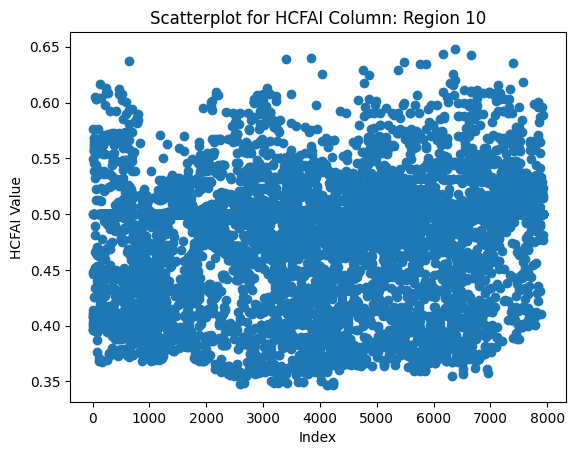

In [18]:
# Scatterplot for the 'HCFAI' column
plt.scatter(x.index, x['HCFAI'])
plt.title(f'Scatterplot for HCFAI Column: Region {region-1}')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Feasibility Factors

In [ ]:
# a = a['buildability_landcov'].notna()
a = df[['Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov',
       'drought_value', 'rain intensity_value', 'flood_probability_value', 'HCFAI']]

a = a[a['RHU_Presence']==0]
a = a.sort_values(by='HCFAI', ascending=False)
a

,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5048,1,1,0,1.0,0.960775,0.430949,0.687815,0.654064
2596,1,1,0,1.0,1.141953,0.249932,0.361025,0.651058
1121,1,1,0,1.0,1.111672,0.289567,0.461596,0.650529
5267,1,0,0,1.0,0.848824,0.427353,0.224119,0.645940
5194,1,0,0,1.0,0.848824,0.427353,0.224119,0.645939
...,...,...,...,...,...,...,...,...
5590,0,0,0,NaN,1.046655,0.516940,0.426333,NaN
5591,0,0,0,NaN,1.088014,0.533677,0.440750,NaN
5596,1,1,0,NaN,0.864514,2.721783,0.598195,NaN
5680,0,1,0,NaN,0.797894,2.648136,1.438344,NaN


# Maximal Coverage Factors

In [ ]:
b = df[['popden_you', 'popden_wom', 'popden_eld', 'popden_chi',
       'popden_w_1', 'popden_all', 'Distance_to_Nearest_RHU_km', 'RHU_Presence', 'HCFAI']]
# b = b[b['buildability_landcov']==1]
b = b.sort_values(by='HCFAI', ascending=False)
# b[b['RHU_Presence']==1]
b

,popden_you,popden_wom,popden_eld,popden_chi,popden_w_1,popden_all,Distance_to_Nearest_RHU_km,RHU_Presence,HCFAI
5048,13.736079,41.149321,8.824771,8.173794,20.816993,363.896997,17.384668,0,0.654064
2596,5.296137,14.032293,2.747063,3.143041,6.904777,155.815402,31.481358,0,0.651058
1121,28.689414,77.553834,12.481618,19.290638,36.829012,125.914306,11.550333,0,0.650529
5267,0.000000,0.000000,0.000000,0.000000,0.000000,41.771628,25.204817,0,0.645940
5194,0.000000,0.000000,0.000000,0.000000,0.000000,124.261193,23.798066,0,0.645939
...,...,...,...,...,...,...,...,...,...
5590,0.000000,0.000000,0.000000,0.000000,0.000000,176.080449,19.736373,0,NaN
5591,0.000000,0.000000,0.000000,0.000000,0.000000,27.348926,19.029579,0,NaN
5596,46.984025,121.805750,14.989535,29.475215,64.996635,370.507160,15.552309,0,NaN
5680,0.000000,0.000000,0.000000,0.000000,0.000000,4.127558,18.802216,0,NaN


# EDA

In [ ]:
c=df['HCFAI'].notna()
c = df[c]
# c = df[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
#        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
#         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
#         'flood_probability_value', 'HCFAI']]
# c = c[c['RHU_Presence']==1]
c = c.sort_values(by='HCFAI', ascending=False)
c = c[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
       'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
        'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
        'flood_probability_value', 'HCFAI']]
c.sort_values(by='HCFAI', ascending=False)

,population_youth,population_women,population_elder60plus,population_children_under5,population_reproductive_women,popden_all_total_population,Distance_to_Nearest_RHU_km,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5703,0.000000,0.000000,0.0,0.000000,0.000000,376.429135,18.697599,1,0,0,1.0,0.542848,2.371210,0.962631,0.581876
1099,0.000000,0.000000,0.0,0.000000,0.000000,466.445625,24.862448,0,0,0,1.0,0.672856,0.268539,0.305392,0.563102
4334,0.000000,0.000000,0.0,0.000000,0.000000,1139.223628,29.861002,0,0,0,1.0,0.713175,0.153043,0.229447,0.534900
2704,0.000000,0.000000,0.0,0.000000,0.000000,23.816927,10.621421,0,0,0,1.0,0.834131,0.092033,0.815355,0.521743
3490,0.000000,0.000000,0.0,0.000000,0.000000,693.544396,13.991199,0,0,0,1.0,0.884191,0.099185,0.681102,0.516955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3900,11520.305136,21600.533088,0.0,2880.050256,12960.330264,50247.186329,2.858075,0,0,0,0.0,0.783897,2.857803,0.389312,0.481524
3937,0.000000,0.000000,0.0,0.000000,0.000000,2736.210123,11.314957,0,0,0,1.0,0.795406,1.766906,1.284616,0.480502
944,0.000000,0.000000,0.0,0.000000,0.000000,5875.884038,10.289214,0,0,0,0.0,0.686629,0.277878,0.934151,0.473992
5,0.000000,0.000000,0.0,0.000000,0.000000,4021.250203,16.685262,0,0,0,0.0,0.800627,1.151205,0.700863,0.467737


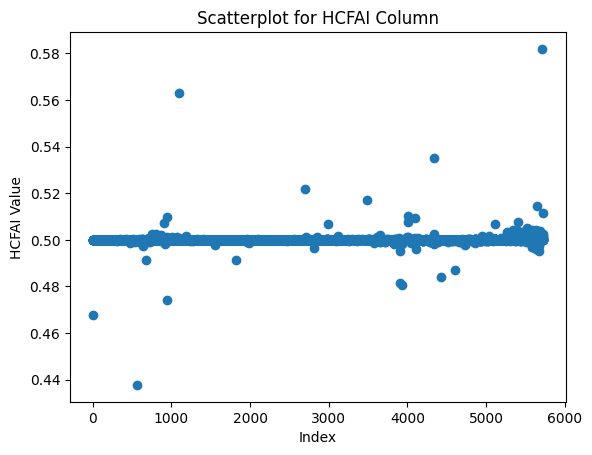

In [ ]:
# Scatterplot for the 'HCFAI' column
plt.scatter(c.index, c['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Exporting

In [19]:
# Specify the file path for the CSV file
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)
print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: /content/drive/MyDrive/MS thesis/HFCAI/RG11/rg11_HCFAI_sum.csv
